In [19]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
from MCForecastTools import MCSimulation
from alpaca_trade_api.rest import REST, TimeFrame

%matplotlib inline

In [20]:
# Load .env enviroment variables
load_dotenv()

True

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price

btc_response = requests.get(btc_url)
btc_price = btc_response.json()["data"]["1"]["quotes"]["CAD"]["price"]

# Fetch current ETH price

eth_response = requests.get(eth_url)
eth_price = eth_response.json()["data"]["1027"]["quotes"]["CAD"]["price"]

# Compute current value of my crpto

my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance

print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $63692.76
The current value of your 5.3 ETH is $19740.25


In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object

api = REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [8]:
# Format current date as ISO format

start_date = pd.Timestamp("2022-02-17", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-03-17", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)


df_portfolio = api.get_bars(tickers, TimeFrame.Day, start_date, end_date).df

# Preview DataFrame

df_portfolio.head(60)

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-02-17 05:00:00+00:00,109.58,109.8050,109.5146,109.64,9807695,25959,109.652013,AGG
2022-02-18 05:00:00+00:00,109.83,109.8800,109.7100,109.87,6896731,20755,109.811675,AGG
2022-02-22 05:00:00+00:00,109.68,109.7800,109.5650,109.75,6925944,21241,109.684022,AGG
2022-02-23 05:00:00+00:00,109.53,109.5500,109.2300,109.26,10990620,24441,109.388778,AGG
2022-02-24 05:00:00+00:00,109.67,109.7681,109.1700,109.46,12371968,36217,109.528219,AGG
2022-02-25 05:00:00+00:00,109.45,109.5800,109.3300,109.57,9234147,27153,109.450920,AGG
2022-02-28 05:00:00+00:00,110.03,110.4300,110.0200,110.36,15026067,34672,110.285559,AGG
2022-03-01 05:00:00+00:00,110.60,111.1700,110.5700,110.82,14248500,39215,110.836369,AGG
2022-03-02 05:00:00+00:00,110.30,110.3800,109.4600,109.49,8489288,27605,109.930996,AGG


In [9]:
# Pick AGG and SPY close prices

close_prices = df_portfolio["2022-03-17 04:00:00+00:00"]
agg_close_price = close_prices.iloc[0]['close']
spy_close_price = close_prices.iloc[1]['close']
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $107.86
Current SPY closing price: $441.07


C:\BCdownloads\envs\devs\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
# Compute the current value of shares

my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22053.50
The current value of your 200 AGG shares is $21572.00


In [11]:
# Set monthly household income

monthly_income = 12000
# Consolidate financial assets data

df_savings = pd.DataFrame(
    {'amount':[my_btc_value + my_eth_value,my_spy_value + my_agg_value]}, 
    index=['crypto', 'shares'])
# Create savings DataFrame


# Display savings DataFrame
display(df_savings)

,amount
crypto,83433.010981
shares,43625.500000


<AxesSubplot:ylabel='amount'>

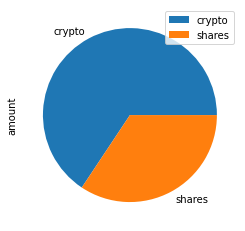

In [12]:
# Plot savings pie chart

df_savings.plot.pie(y='amount')

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
current_savings = df_savings.sum()[0]
# Calculate total amount of savings

if current_savings > emergency_fund:
    print("Congratulations, you have enough money in this fund")
elif current_savings == emergency_fund:
    print("Congratulations, you have reached your financial goal")
else:
    print(f"You are ${emergency_fund-current_savings:0.2f} from your goal")
# Validate saving health


Congratulations, you have enough money in this fund


In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)

df_stock_data = api.get_bars(['AGG', 'SPY'], TimeFrame.Day, start_date, end_date).df

# Display sample data
df_stock_data.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2016-05-02 04:00:00+00:00,110.74,110.7400,110.5200,110.61,3553939,15119,110.627199,AGG
2016-05-03 04:00:00+00:00,110.89,110.9450,110.7500,110.81,3044940,15662,110.865995,AGG
2016-05-04 04:00:00+00:00,110.91,110.9315,110.7595,110.86,2920608,13982,110.879063,AGG
2016-05-05 04:00:00+00:00,110.92,111.1600,110.8010,111.14,3008142,15707,111.028363,AGG
2016-05-06 04:00:00+00:00,111.12,111.1200,110.9700,110.97,2718710,12697,111.031967,AGG


In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

def format_MCSimulation(df_ticker):
    ticker_list = df_ticker['symbol'].unique()
    df_ = pd.DataFrame()
    for ticker in ticker_list:
        df_ticker_reformatted = df_ticker[df_ticker['symbol'] == ticker]
        df_ticker_reformatted.columns = pd.MultiIndex.from_product([[ticker],df_ticker.columns])
        if df_.empty:
            df_ = df_ticker_reformatted
        else:
            df_ = pd.concat([df_,
                            df_ticker_reformatted],
                            axis = 1,
                            join='inner')

    return df_

df_stock_data_reformatted = format_MCSimulation(df_stock_data)
df_stock_data_reformatted.head(-5)

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   
...                           ...       ...       ...     ...      ...   
2021-04-19 04:00:00+00:00  114.41  114.5000  114.0000  114.45  4795013   
2021-04-20 04:00:00+00:00  114.42  114.6700  114.3900  114.63  4122422   
2021-04-21 04:00:00+00:00  114.60  114.7400  114.5300  114.74  5254501   
2021-04-22 04:00:00+00:00  114.74  114.8000  114.5900  114.77  4570468   
2021-04-23 04:00:00+00:00  114.81  115.0860  114.6415  114.75  3813862   

                                                             SPY            \
                          trade_count        vwap symbol    open      high   
timestamp                                                                    
2016-05-02 04:00:00+00:00       15119  110.627199    AGG  206.90  208.1800   
2016-05-03 04:00:00+00:00       15662  110.865995    AGG  206.50  206.8000   
2016-05-04 04:00:00+00:00       13982  110.879063    AGG  205.00  205.8500   
2016-05-05 04:00:00+00:00       15707  111.028363    AGG  205.57  205.9800   
2016-05-06 04:00:00+00:00       12697  111.031967    AGG  204.04  205.7700   
...                               ...         ...    ...     ...       ...   
2021-04-19 04:00:00+00:00       21986  114.429381    AGG  416.26  416.7400   
2021-04-20 04:00:00+00:00       16333  114.600160    AGG  413.93  415.0859   
2021-04-21 04:00:00+00:00       25027  114.631637    AGG  411.55  416.2900   
2021-04-22 04:00:00+00:00       13067  114.740034    AGG  415.91  416.7800   
2021-04-23 04:00:00+00:00       11265  114.743341    AGG  412.82  418.2500   

                                                                              \
                              low   close     volume trade_count        vwap   
timestamp                                                                      
2016-05-02 04:00:00+00:00  206.41  208.03   61908515      263580  207.294812   
2016-05-03 04:00:00+00:00  205.28  206.13  106422142      377518  206.312060   
2016-05-04 04:00:00+00:00  204.42  204.96   92199810      345261  205.090172   
2016-05-05 04:00:00+00:00  204.47  204.95   67597222      280622  205.141555   
2016-05-06 04:00:00+00:00  203.88  205.70   89131004      340335  204.937074   
...                           ...     ...        ...         ...         ...   
2021-04-19 04:00:00+00:00  413.79  415.21   75527000      450182  415.352416   
2021-04-20 04:00:00+00:00  410.59  412.17   79104051      476871  412.677447   
2021-04-21 04:00:00+00:00  411.36  416.07   64672721      359135  414.531238   
2021-04-22 04:00:00+00:00  411.13  412.27   97276832      587727  413.942573   
2021-04-23 04:00:00+00:00  412.79  416.74   73241320      362355  415.667363   

                                  
                          symbol  
timestamp                         
2016-05-02 04:00:00+00:00    SPY  
2016-05-03 04:00:00+00:00    SPY  
2016-05-04 04:00:00+00:00    SPY  
2016-05-05 04:00:00+00:00    SPY  
2016-05-06 04:00:00+00:00    SPY  
...                          ...  
2021-04-19 04:00:00+00:00    SPY  
2021-04-20 04:00:00+00:00    SPY  
2021-04-21 04:00:00+00:00    SPY  
2021-04-22 04:00:00+00:00    SPY  
2021-04-23 04:00:00+00:00    SPY  

[1254 rows x 16 columns]

In [21]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data_reformatted,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)


In [22]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns

MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\BCdownloads\API homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.024473,0.992828,1.013615,1.002534,0.996799,1.006104,0.996808,0.998061,0.994956,0.993430,...,1.018325,1.004333,1.002400,1.004830,0.999650,0.997505,1.002445,0.998557,1.002453,0.991314
2,1.016132,0.976750,1.015526,1.005968,0.995869,1.015504,0.994567,0.989094,0.988137,1.003146,...,1.016815,0.990813,0.996438,1.000395,0.994123,1.008154,1.019009,0.999689,1.007905,0.986913
3,1.017520,0.989710,1.012919,1.002910,0.991387,1.009514,0.992991,0.988440,0.972701,1.000790,...,1.002120,0.988997,0.997687,1.005057,0.998729,1.005130,1.032672,0.999348,1.014034,0.983994
4,1.031937,0.989866,1.019863,1.012897,0.982007,1.015740,0.980952,0.996583,0.974330,1.004455,...,0.994950,0.973271,0.985808,1.000207,0.996472,1.016779,1.035974,1.002362,1.013819,0.980431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,12.432787,10.578343,23.532266,16.568521,5.590940,9.786511,13.718741,10.153180,10.145042,13.573532,...,16.750414,23.403767,91.171934,29.069122,14.544609,11.418317,24.170573,50.493210,6.699216,4.546430
7557,12.410168,10.659388,23.287055,16.685215,5.584024,9.766765,13.746687,10.125750,10.183872,13.363041,...,16.797849,23.370401,90.222078,29.092068,14.289943,11.435166,24.418435,50.213526,6.717024,4.533397
7558,12.442339,10.671356,23.199240,16.634598,5.648917,9.761503,13.766120,10.138295,10.174544,13.323966,...,16.867645,23.582917,90.619405,29.017414,14.250879,11.488807,24.294543,51.201426,6.707937,4.491121
7559,12.498320,10.567656,23.233143,16.773097,5.585462,9.748253,13.813356,10.188490,10.176230,13.305583,...,16.851313,23.811059,91.570390,29.016897,14.063766,11.370839,24.330209,51.075485,6.665161,4.508898


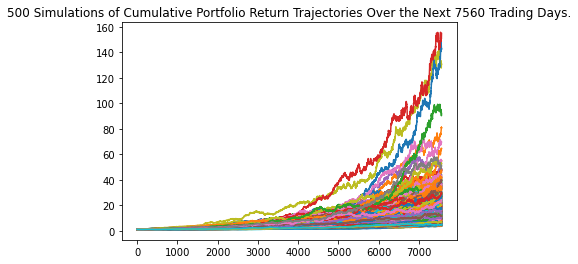

In [23]:
# Plot simulation outcomes

line_plot = MC_thirtyyear.plot_simulation()

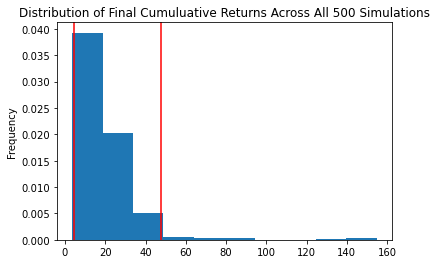

In [24]:
# Plot probability distribution and confidence intervals

dist_plot = MC_thirtyyear.plot_distribution()

In [25]:
# Fetch summary statistics from the Monte Carlo simulation results

tbl = MC_thirtyyear.summarize_cumulative_return()
# Print summary statistics

print(tbl)

count           500.000000
mean             18.941724
std              14.917964
min               3.550474
25%              10.311348
50%              15.676447
75%              22.822924
max             154.761913
95% CI Lower      4.621886
95% CI Upper     47.496407
Name: 7560, dtype: float64


In [26]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000

ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $92437.72 and $949928.14


In [27]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000

ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $138656.59 and $1424892.21
